In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import FontProperties
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Valores do PIB em MIL REAIS
dados = {
	"PIB": [4977380,	6641551,	7345367,	7972413,	7281699,	8691529,	9004709,	13705138,	12718014,	10605535,	9794767,	11219230,	9986300,	16245261,	20133836,	18883627,	19218794,	19611051,	18452358,	21995362],
	"PIB Ajustado IPCA": [15247685,	18326495,	18900575,	19313464,	17123300,	19617079,	19103580,	27898683,	24508120,	19164592,	16771370,	18161719,	15171304,	22339650,	25878750,	23609827,	23094500,	22818589,	20583030,	21995362 ],
	"ANO": [x for x in range(2002, 2022)]
}
dados = pd.DataFrame(dados)
dados = dados.set_index("ANO")
dados

,PIB,PIB Ajustado IPCA
ANO,,
2002,4977380,15247685
2003,6641551,18326495
2004,7345367,18900575
2005,7972413,19313464
2006,7281699,17123300
2007,8691529,19617079
2008,9004709,19103580
2009,13705138,27898683
2010,12718014,24508120


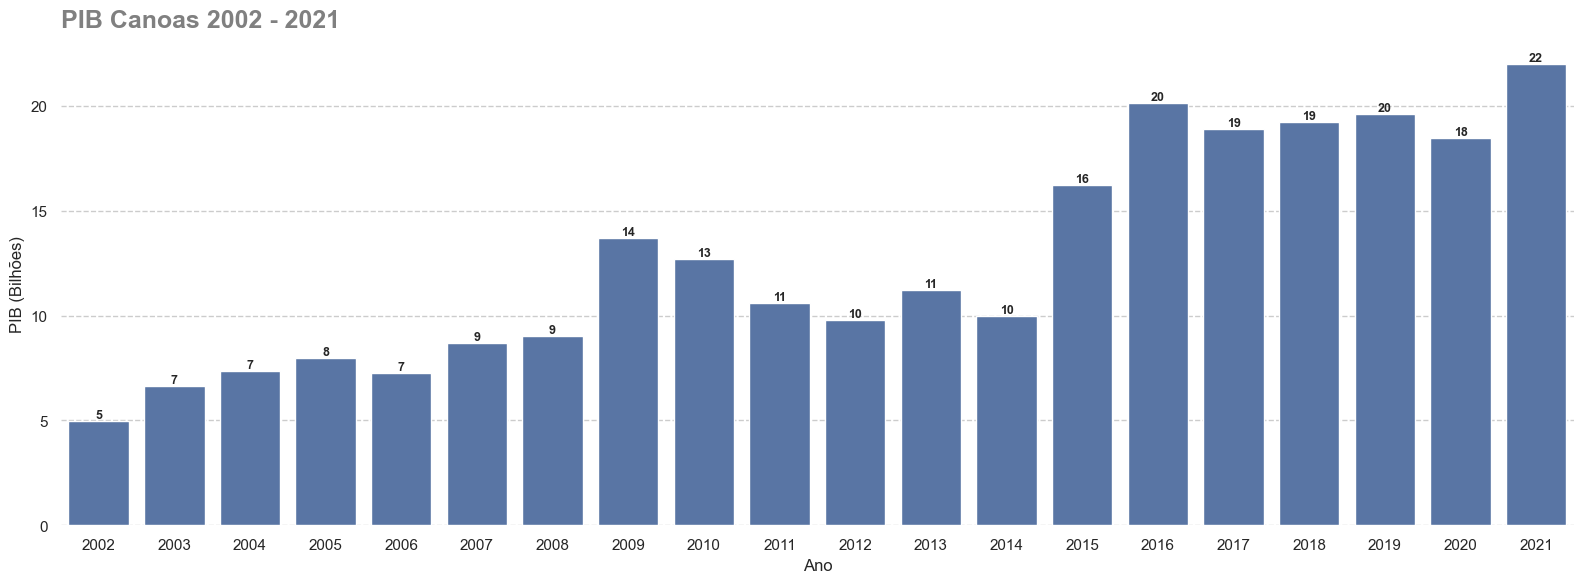

In [16]:
def format_currency(x, pos):
	x = x / 1000000
	return f'{x:,.0f}'.replace(',', 'v').replace('.', ',').replace('v', '.')

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(16, 6))  # Ajuste aqui para o tamanho desejado
fig.subplots_adjust(right=0.95, left=0.05)  # Ajuste aqui para margem desejada

ax = sns.barplot(y="PIB", x="ANO", data=dados, ax=ax)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_currency))
ax.set_xlabel("Ano")
ax.set_ylabel("PIB (Bilhões)")
ax.yaxis.grid(linestyle='--', linewidth=1)


offset = 0.5  # Adicionando offset para os valores não se sobreporem

for i, valor in enumerate(dados['PIB']):
	qtd = f'{(valor / 1000000):,.0f}'.replace(',', '.')
	ax.text(i, valor + offset, qtd, fontsize=9, fontweight='bold', ha='center', va='bottom')

ax.set_title("PIB Canoas 2002 - 2021", fontweight="bold", fontsize=18, loc="left", pad=10, color="grey")
sns.despine(left=True, bottom=True)
fig.tight_layout()
plt.show()


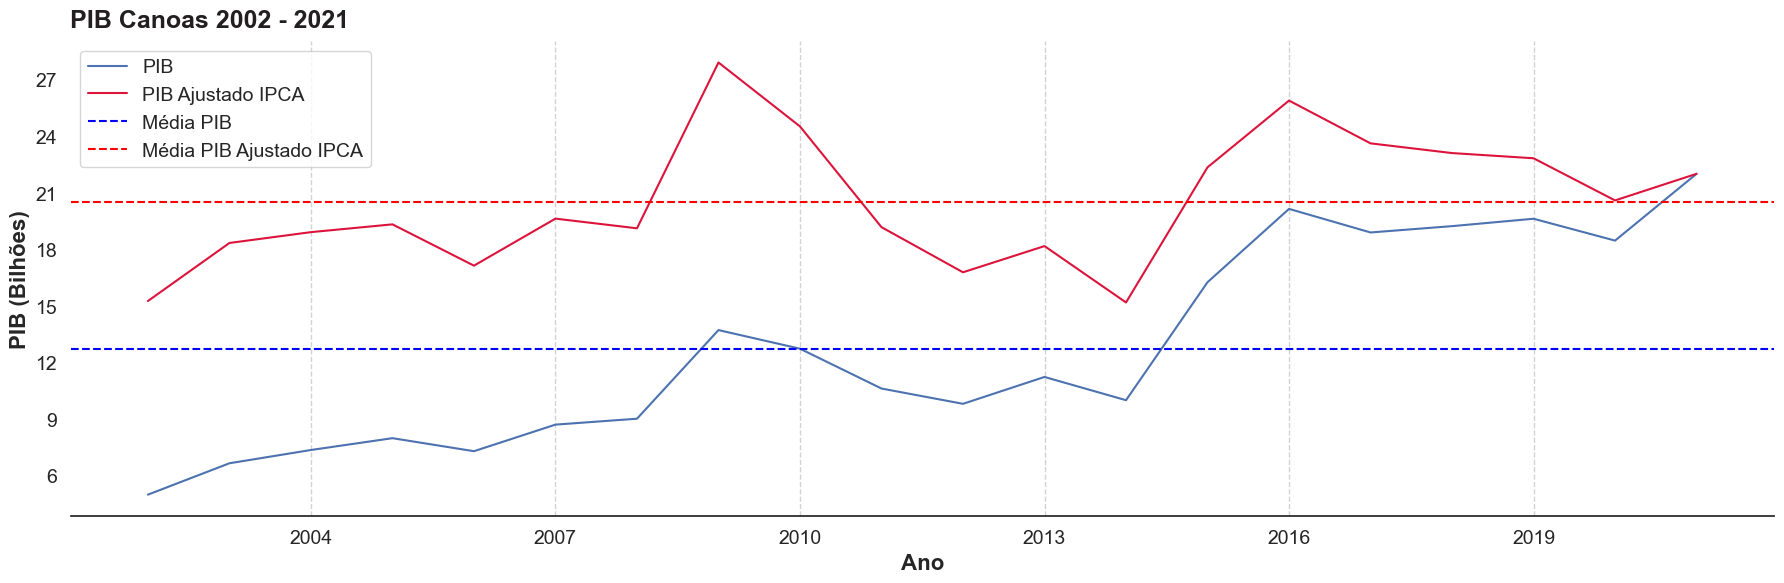

In [4]:
def format_currency(x, pos):
	x = x / 1000000
	return f'{x:,.0f}'.replace(',', 'v').replace('.', ',').replace('v', '.')

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import FontProperties

sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(18, 6))
fig.subplots_adjust(right=0.9, left=0.1)

# Gráfico 1 - PIB
line1 = sns.lineplot(y="PIB", x="ANO", data=dados, ax=ax, label='PIB')

# Gráfico 2 - PIB Ajustado IPCA
line2 = sns.lineplot(y="PIB Ajustado IPCA", x="ANO", data=dados, ax=ax, label='PIB Ajustado IPCA', color="crimson")

# Adicionando linhas de médias
media_pib = dados["PIB"].mean()
media_pib_ajustado = dados["PIB Ajustado IPCA"].mean()
ax.axhline(media_pib, color='blue', linestyle='--', label='Média PIB')
ax.axhline(media_pib_ajustado, color='red', linestyle='--', label='Média PIB Ajustado IPCA')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_currency))
ax.set_xlabel("Ano", fontsize=16, fontweight="bold")
ax.set_ylabel("PIB (Bilhões)", fontsize=16, fontweight="bold")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.grid(linestyle='--', linewidth=1, color='lightgrey')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
font_properties = FontProperties(size=14)

for label in ax.get_xticklabels():
	label.set_fontproperties(font_properties)
for label in ax.get_yticklabels():
	label.set_fontproperties(font_properties)

# Adicionando a legenda
ax.legend(loc='best', fontsize=14)

ax.set_title("PIB Canoas 2002 - 2021", fontweight="bold", fontsize=18, loc="left", pad=10, color='#231F20')
sns.despine(left=True, bottom=False)
fig.tight_layout()
plt.show()
